# **Hackathon 1 Retail Data Analytics**

---

# Section 2: Data Visualization

## Objectives

In Section 2, the aim is to anaylsis and present using 3 different plotting tools: Matpotlib, Seaborn and plotly to visualize the anaylsis and proof the hypothesis made. There will be a summary of findings and conclusion in the Section 3.


## Inputs

* A cleaned dataset prepared in Section 1 will be used. 
    *  [retail_cleaned.csv](../dataset/processed/retail_cleaned.csv)

## Outputs

* Findings with various graphs by Matpotlib, Seaborn and plotly will be demonstrated through this Jupyter Notebook. All the result will be summarized in README.md below.
    * [README.md](../README.md)

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/hackathon1-retail-sales-data-analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/hackathon1-retail-sales-data-analysis'

---

# Part A 

# Matpotlib (basic static graphs)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load dataset from csv files
df = pd.read_csv("dataset/processed/retail_cleaned.csv")

In [6]:
# Convert 'Date' column to datetime since it's in object format after load
df['Date'] = pd.to_datetime(df['Date'])


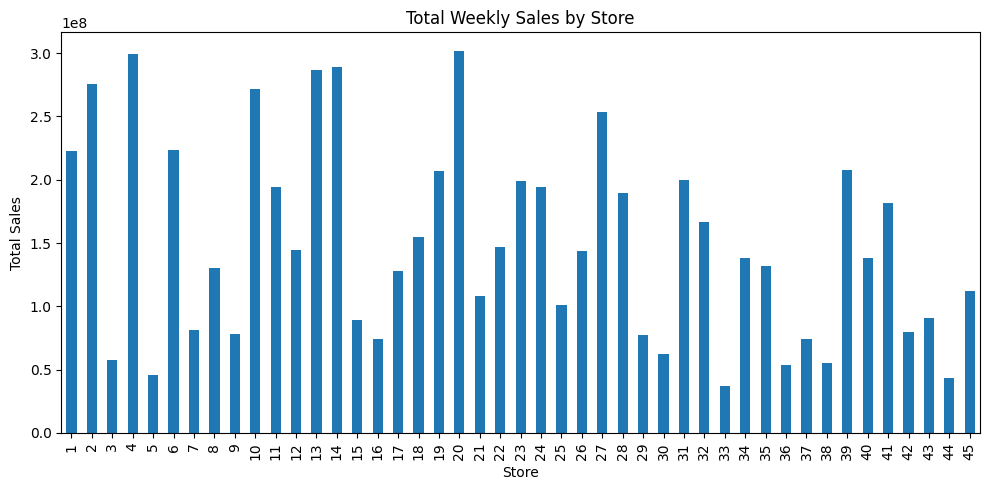

In [7]:
# 1. Total Weekly Sales by Store
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [20]:
# Top 5 sales stores
df_top_sales_store = (
    df.groupby('Store', as_index=False)['Weekly_Sales'].sum()                                         
      .sort_values(by='Weekly_Sales', ascending=False)
      .rename(columns={'Weekly_Sales': 'Total_Sales'})
)

df_top_sales_store.head(5)

,Store,Total_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


* By comparing accumulative sales across stores, the company can easily identify high- and low-performing stores, then adopt targeted marketing strategies to boost sales and reduce costs. Besides, the company can look deep into the low-performing stores with root cause analysis to guide the decisions on store expansion or closure.

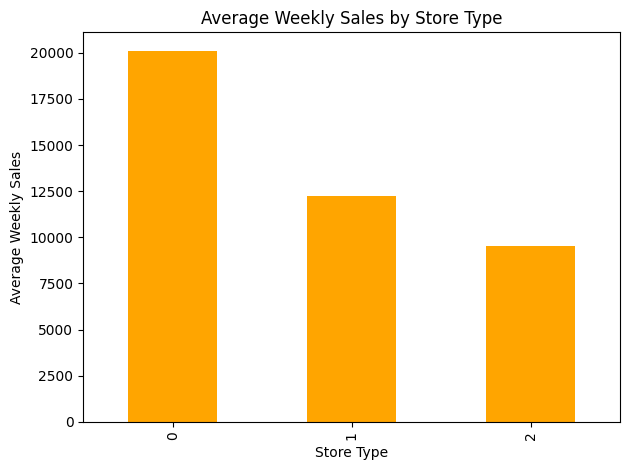

In [9]:
# 2. Average Sales by Store Type
if 'Type' in df.columns:
    df.groupby('Type')['Weekly_Sales'].mean().plot(kind='bar', color='orange')
    plt.title('Average Weekly Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('Average Weekly Sales')
    plt.tight_layout()
    plt.show()

* With the comparison on store type, it shows the Store type 0:A (with ordinal encoder) with the highest average sales. The company should deploy more resource for Inventory of goods for store type A.

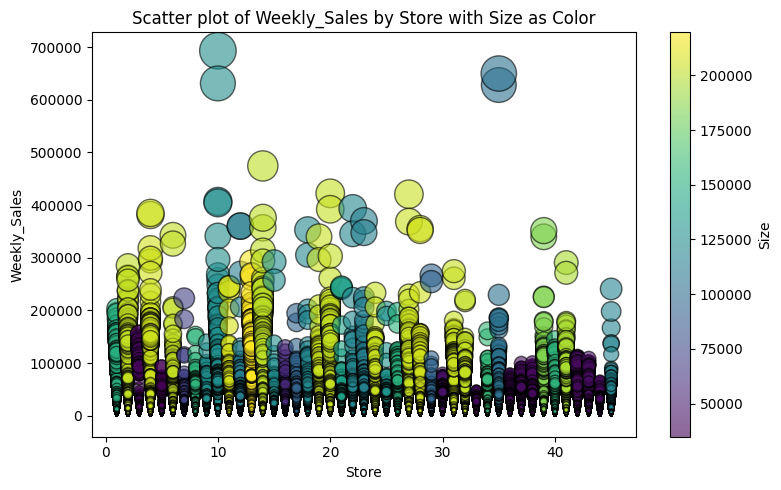

In [ ]:
x = 'Store'
y = 'Weekly_Sales'

plt.figure(figsize=(8,5))
plt.scatter( df[x], df[y], 
    c=df['Size'],         # color by Size column
    s=df[y] * 0.001,       # scale point size
    cmap='viridis',       # color map
    alpha=0.6, 
    edgecolor='black'
)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter plot of {y} by {x} with Size as Colour')
plt.colorbar(label='Size')
plt.tight_layout()
plt.show()

* Further investigating the correlation between the size of the store and the sales, it is clear that the larger store will contribute higher sales significantly.

---

# Part B

# Seaborn (advance static graphs)

In [10]:
import seaborn as sns

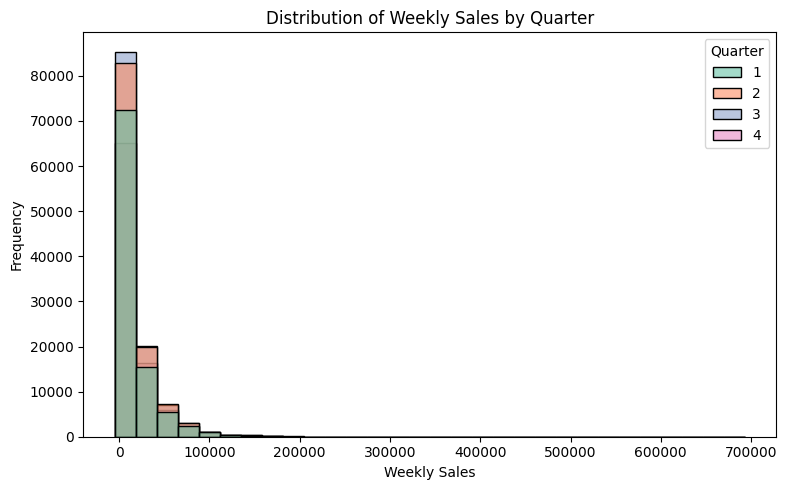

In [11]:
# 1. Histogram of Weekly Sales by Quarter
df['Quarter'] = df['Date'].dt.quarter
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Weekly_Sales', hue='Quarter', bins=30, 
             palette='Set2', edgecolor='black', kde=False, alpha=0.6)

plt.title('Distribution of Weekly Sales by Quarter')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

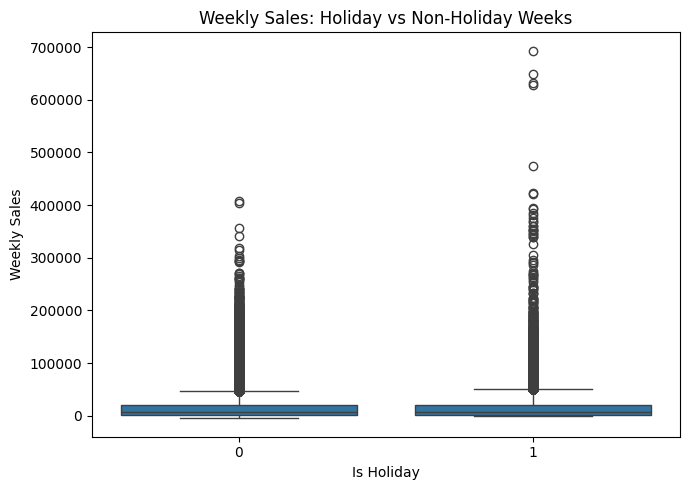

In [19]:
# 2.Boxplot: Weekly Sales during Holidays vs Non-Holidays
plt.figure(figsize=(7,5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

---

# Part C

In [12]:
# plotly (advance interactive graphs)

---

---

# Section 3 : Conclusions and next steps